# Praktikum Informationstechnik im Maschinenbau II
## P08 - Geschwindigkeitsmessung mit Kreuzkorrelation


### DSP Kreuzkorrelation/Transrapid
Viele Messgeräte basieren auf Korrelationstechniken, z.B. die berührungslose Geschwindigkeitsmessung des Transrapid.
Hierbei werden zwei optische Sensoren so befestigt, dass sie die Oberfläche der Schiene erfassen.
(Beim Transrapid gibt es ja bekanntliche keine Räder ;))
Die beiden Signale werden anschließend korreliert. Der zeitliche Versatz der beiden Signale, der mit der Kreuzkorrelation
bestimmt wird und der Abstand der beiden Sensoren, dienen zur Ermittlung der Geschwindigkeit des Transrapids.
Zwei Signale „WaveA.wav“ und „WaveB.wav“ stellen die abgetasteten Sensordaten der beiden optischen Sensoren da.
Der Abstand der Sensoren ist 100mm. Bitte ermitteln Sie die Geschwindigkeit des Transrapids mithilfe der Kreuzkorrelation.
Bitte untersuchen sie davor jedes einzelne Signal auf Ähnlichkeit. Leiten Sie die Gleichung für die Geschwindigkeit her.


### 1. Import der benötigten Packages

In [2]:
import thinkdsp
import thinkplot
import numpy as np

### 2. Einlesen der beiden Wave Dateien mit Daten der optischen Sensoren

In [23]:
a = thinkdsp.read_wave('WaveA.wav')
b = thinkdsp.read_wave('WaveB.wav')

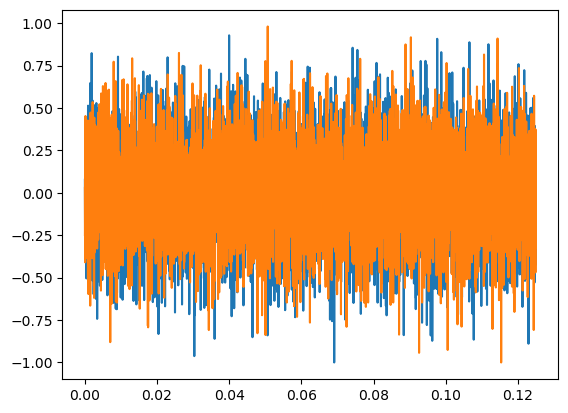

In [24]:
a.plot()
b.plot()

### 3. Ermittlung notwendiger Parameter
Hier müssen die Länge der Wave und die Abtastrate ermittelt werden

In [75]:
dura = a.duration
fra = a.framerate
aa = a.ys
print('Wave A Länge =', dura)
print('Wave A Abtastrate =',fra)

Wave A Länge = 0.125
Wave A Abtastrate = 40000


In [74]:
durb = b.duration
frb = b.framerate
ab = b.ys
print('Wave B Länge =', durb)
print('Wave B Abtastrate =',frb)

Wave B Länge = 0.125
Wave B Abtastrate = 40000


### 4. Korrelation der beiden Waves
Korrelieren Sie die beiden Waves, indem Sie auf die Samples zugreifen und die Funktion
correlate des numpy package benutzen.
Stellen Sie die Kreuzkorrelationsfunktion dar.

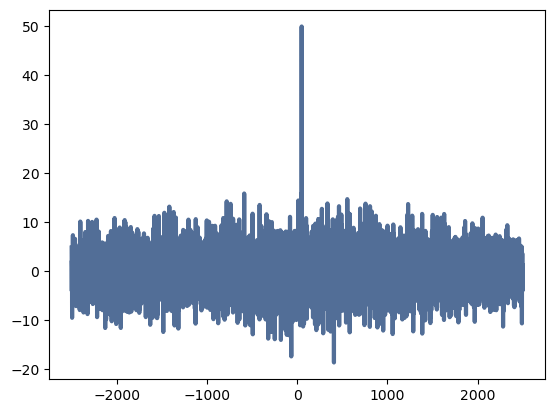

In [49]:
n = len(a)
corrs = np.correlate(aa, ab, mode='same')
lags = np.arange(-n//2, n//2) # lags ist die Versetzung
thinkplot.plot(lags, corrs)

### 5. Korrelieren die beiden Signale?
Untersuchen Sie das zurückgegebene Array und entscheiden Sie, ob die beiden Funktionen korrelieren.
Bestimmen Sie das Maximum des Arrays und geben Sie die Zeit an, die zu dem Sample gehört.

In [70]:
dt = (corrs.argmax()-len(a)/2)/fra
dt

0.00125

### 6. Ermitteln Sie die Geschwindigkeit des Transrapids

In [71]:
speed = 0.1 / dt
speed

80.0

In [72]:
f'zeitlicher Versatz : dt={dt}. speed={speed} m/s, entspricht {speed*3.6} km/h'

'zeitlicher Versatz : dt=0.00125. speed=80.0 m/s, entspricht 288.0 km/h'

### 7. Ermitteln Sie die zusammengehörigen Dateien
Es wurden weitere Wave Dateien zur Geschwindigkeitsermittlung aufgenommen.
Die Dateien PTWave1.wav bis PTWave4.wav. Leider sind diese Dateien durcheinander
geraten, so dass nicht klar ist, welche Paare zusammengehören.
Bitte untersuchen Sie alle vier Dateien indem Sie die Daten paarweise korrelieren
und finden Sie heraus, welche Dateien zusammengehören und welche Geschwindigkeit
sich dabei ergibt.
### Übrigens: der Transrapid fährt hier nur vorwärts ;)

In [89]:
fnames = ['PTWave1.wav','PTWave2.wav','PTWave3.wav','PTWave4.wav']

In [96]:
for fn1 in fnames:
    for fn2 in fnames:
        if fn1==fn2:
            continue
        wave1 =thinkdsp.read_wave(fn1)
        wave2 =thinkdsp.read_wave(fn2)
        corr = np.correlate(wave1.ys, wave2.ys, mode='same')
        if corr.max() < 20:
            continue
        dt = (corr.argmax() - len(wave1) / 2)/wave2.framerate
        if dt < 0:
              continue
        print({fn1}, '->', {fn2}, 'Korreliert, mit', corr.max())
        speed = 0.1/dt
        print('zeitlicher Versatz: delta t=', dt, 'speed =', {speed},  'm/s, entspricht', {speed*3.6}, 'km/h')

{'PTWave2.wav'} -> {'PTWave4.wav'} Korreliert, mit 45.3392648955108
zeitlicher Versatz: delta t= 0.025 speed = {4.0} m/s, entspricht {14.4} km/h
{'PTWave3.wav'} -> {'PTWave1.wav'} Korreliert, mit 51.4209040980321
zeitlicher Versatz: delta t= 0.002 speed = {50.0} m/s, entspricht {180.0} km/h


In [85]:
aq = thinkdsp.read_wave('PTWave1.wav')
fraa = aq.framerate
bq = thinkdsp.read_wave('PTWave3.wav')
aaa = aq.ys
aba = bq.ys

-0.002

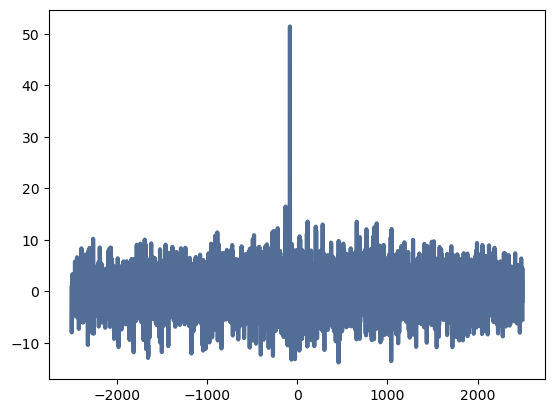

In [86]:
n = len(aq)
corrs = np.correlate(aaa, aba, mode='same')
lags = np.arange(-n//2, n//2) # lags ist die Versetzung
thinkplot.plot(lags, corrs)
dt = (corrs.argmax()-n/2)/fraa
dt